In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.stats import skew, kurtosis

import warnings

warnings.filterwarnings(action = 'ignore')

## 1. 데이터 입력

### 1.1 행정동, 밀도 데이터 로드 및 병합

In [2]:
tmp_df = pd.read_csv('../data/행정동_컬럼추가_최종ver.csv')
pd.set_option('display.max_columns',35)
# tmp_df
tmp_df.rename(columns={'Unnamed: 0':'index'},inplace=True)
tmp_df.set_index('index',inplace=True)

In [3]:
tmp_df.rename(columns={'인구수':'MZ_NUM'},inplace=True)
tmp_df

,GU,DONG,DONG_CODE,ACADEMY_NUM,KINDER_NUM,FIRE_NUM,ELE_SCH_NUM,MID_SCH_NUM,HIGH_SCH_NUM,CCTV_NUM,POLICE_NUM,BIKE_NUM,CAR_SHR_NUM,SUBWAY_NUM,SAFE_DLVR_NUM,DPTM_NUM,ANI_HSPT_NUM,PHARM_NUM,LEISURE_NUM,KIDS_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,CON_NUM,NOISE_VIBRATION_NUM,CHILD_MED_NUM,CAFE_NUM,PARK_NUM,HOSPITAL_NUM,BUS_CNT,RETAIL_NUM,COLIVING_NUM,MZ_NUM
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,종로구,청운효자동,1111051500,18.000000,0.000000,1.0,2.000000,2.000000,3.0,56.666667,2.000000,5.666667,1.000000,0.333333,1.000000,0.0,2.000000,4.333333,1.000000,0.000000,0.0,0.0,0.000000,0.333333,0.0,4.000000,18816.000000,7.333333,39.666667,1.666667,11.666667,14.0,0.000000,0.0,3210
1,종로구,사직동,1111053000,19.000000,10.000000,0.0,2.000000,0.000000,0.0,41.666667,3.000000,11.666667,5.000000,1.333333,0.000000,0.0,1.000000,17.333333,1.000000,0.000000,0.0,18.0,3.000000,7.333333,0.0,20.000000,22848.000000,10.333333,100.666667,2.666667,74.666667,16.0,2.000000,1.0,2749
2,종로구,삼청동,1111054000,2.000000,10.000000,0.0,0.000000,1.000000,1.0,22.000000,1.000000,7.000000,1.000000,1.000000,0.000000,0.0,0.000000,2.000000,0.000000,0.000000,1.0,3.0,0.000000,1.000000,0.0,2.000000,14112.000000,1.000000,52.000000,1.000000,7.000000,11.0,0.000000,0.0,684
3,종로구,부암동,1111055000,24.000000,0.000000,1.0,4.000000,1.000000,1.0,41.000000,1.000000,5.000000,5.000000,0.000000,0.000000,0.0,3.000000,1.000000,0.000000,0.000000,0.0,2.0,2.000000,0.000000,0.0,8.000000,6048.000000,5.000000,30.000000,1.000000,4.000000,9.0,0.000000,0.0,2585
4,종로구,평창동,1111056000,28.000000,0.000000,0.0,0.000000,0.000000,1.0,21.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.000000,0.000000,0.000000,0.0,5.0,5.000000,1.000000,0.0,6.000000,4032.000000,10.000000,36.000000,0.000000,14.000000,37.0,0.000000,0.0,4597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,63.333333,16.666667,1.0,1.333333,0.333333,0.0,52.000000,0.333333,6.000000,6.666667,0.333333,0.666667,0.0,2.666667,12.666667,1.666667,0.666667,0.0,10.0,4.666667,1.333333,0.0,38.666667,1442.333333,4.000000,47.666667,0.000000,59.333333,11.0,3.333333,0.0,8130
422,강동구,성내3동,1174066000,63.333333,16.666667,1.0,1.333333,0.333333,0.0,52.000000,0.333333,6.000000,6.666667,0.333333,0.666667,0.0,2.666667,12.666667,1.666667,0.666667,0.0,10.0,4.666667,1.333333,0.0,38.666667,1442.333333,4.000000,47.666667,0.000000,59.333333,9.0,3.333333,0.0,7120
423,강동구,길동,1174068500,100.000000,20.000000,1.0,6.000000,1.000000,0.0,119.000000,0.000000,9.000000,10.000000,1.000000,1.000000,0.0,8.000000,35.000000,3.000000,1.000000,0.0,18.0,9.000000,2.000000,0.0,76.000000,4327.000000,10.000000,63.000000,1.000000,120.000000,28.0,8.000000,0.0,14486


In [4]:
tmp_df.columns

Index(['GU', 'DONG', 'DONG_CODE', 'ACADEMY_NUM', 'KINDER_NUM', 'FIRE_NUM',
       'ELE_SCH_NUM', 'MID_SCH_NUM', 'HIGH_SCH_NUM', 'CCTV_NUM', 'POLICE_NUM',
       'BIKE_NUM', 'CAR_SHR_NUM', 'SUBWAY_NUM', 'SAFE_DLVR_NUM', 'DPTM_NUM',
       'ANI_HSPT_NUM', 'PHARM_NUM', 'LEISURE_NUM', 'KIDS_NUM', 'SPORT_NUM',
       'GYM_NUM', 'GOLF_NUM', 'STARBUCKS_NUM', 'MC_NUM', 'CON_NUM',
       'NOISE_VIBRATION_NUM', 'CHILD_MED_NUM', 'CAFE_NUM', 'PARK_NUM',
       'HOSPITAL_NUM', 'BUS_CNT', 'RETAIL_NUM', 'COLIVING_NUM', 'MZ_NUM'],
      dtype='object')

In [5]:
density_df = pd.read_excel('../data/인구밀도.xlsx')
density_df

,GU,DONG,POP,AREA,DENSITY
0,종로구,사직동,9636,1.23,7834
1,종로구,삼청동,2739,1.49,1838
2,종로구,부암동,9782,2.27,4309
3,종로구,평창동,18329,8.87,2066
4,종로구,무악동,8297,0.36,23047
...,...,...,...,...,...
421,강동구,천호2동,33753,1.57,21499
422,강동구,길동,45973,2.17,21186
423,강동구,강일동,32982,2.26,14594
424,강동구,상일1동,38929,2.65,14690


In [ ]:
density_df

### 1.2 피처 별 가중치 부여 및 통합

### 분류 가중치 비율
- 교통 : 자전거 : 버스 : 지하철 = 0.06 : 0.93 : 1
- 치안 : 안심택배 제외 나머지 합산
- 건강 : 병원 : 약국 = 0.94 : 0.06
- 편의 :
- 교육 : 공교육(초,중,고) : 사교육(학원) = 1(0.9 : 0.07 : 0.03) : 0.7
- 육아 : 합산

In [6]:
# 행정동 데이터, 밀도 데이터 병합
tmp = pd.merge(tmp_df, density_df)

# 컬럼 순서 정렬
tmp = tmp[['GU','DONG','DONG_CODE','POP','AREA','DENSITY',\
           'SUBWAY_NUM','BUS_CNT','BIKE_NUM',\
           'POLICE_NUM','FIRE_NUM','CCTV_NUM',\
           'HOSPITAL_NUM','PHARM_NUM',\
           'DPTM_NUM','RETAIL_NUM','CON_NUM','CAFE_NUM',\
           'ELE_SCH_NUM','MID_SCH_NUM','HIGH_SCH_NUM','ACADEMY_NUM',\
           'KINDER_NUM','CHILD_MED_NUM',\
           'MZ_NUM','COLIVING_NUM','KIDS_NUM','STARBUCKS_NUM','MC_NUM','NOISE_VIBRATION_NUM','SAFE_DLVR_NUM','LEISURE_NUM','SPORT_NUM','GYM_NUM','GOLF_NUM','CAR_SHR_NUM','ANI_HSPT_NUM']]
tmp

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,SUBWAY_NUM,BUS_CNT,BIKE_NUM,POLICE_NUM,FIRE_NUM,CCTV_NUM,HOSPITAL_NUM,PHARM_NUM,DPTM_NUM,RETAIL_NUM,CON_NUM,...,HIGH_SCH_NUM,ACADEMY_NUM,KINDER_NUM,CHILD_MED_NUM,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,SAFE_DLVR_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,0.333333,14.0,5.666667,2.000000,1.0,56.666667,11.666667,4.333333,0.0,0.000000,4.000000,...,3.0,18.000000,0.000000,7.333333,3210,0.0,0.000000,0.333333,0.0,18816.000000,1.000000,1.000000,0.0,0.0,0.000000,1.000000,2.000000
1,종로구,사직동,1111053000,9636,1.23,7834,1.333333,16.0,11.666667,3.000000,0.0,41.666667,74.666667,17.333333,0.0,2.000000,20.000000,...,0.0,19.000000,10.000000,10.333333,2749,1.0,0.000000,7.333333,0.0,22848.000000,0.000000,1.000000,0.0,18.0,3.000000,5.000000,1.000000
2,종로구,삼청동,1111054000,2739,1.49,1838,1.000000,11.0,7.000000,1.000000,0.0,22.000000,7.000000,2.000000,0.0,0.000000,2.000000,...,1.0,2.000000,10.000000,1.000000,684,0.0,0.000000,1.000000,0.0,14112.000000,0.000000,0.000000,1.0,3.0,0.000000,1.000000,0.000000
3,종로구,부암동,1111055000,9782,2.27,4309,0.000000,9.0,5.000000,1.000000,1.0,41.000000,4.000000,1.000000,0.0,0.000000,8.000000,...,1.0,24.000000,0.000000,5.000000,2585,0.0,0.000000,0.000000,0.0,6048.000000,0.000000,0.000000,0.0,2.0,2.000000,5.000000,3.000000
4,종로구,평창동,1111056000,18329,8.87,2066,0.000000,37.0,7.000000,1.000000,0.0,21.000000,14.000000,5.000000,0.0,0.000000,6.000000,...,1.0,28.000000,0.000000,10.000000,4597,0.0,0.000000,1.000000,0.0,4032.000000,0.000000,0.000000,0.0,5.0,5.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,0.333333,11.0,6.000000,0.333333,1.0,52.000000,59.333333,12.666667,0.0,3.333333,38.666667,...,0.0,63.333333,16.666667,4.000000,8130,0.0,0.666667,1.333333,0.0,1442.333333,0.666667,1.666667,0.0,10.0,4.666667,6.666667,2.666667
422,강동구,성내3동,1174066000,23346,0.71,32882,0.333333,9.0,6.000000,0.333333,1.0,52.000000,59.333333,12.666667,0.0,3.333333,38.666667,...,0.0,63.333333,16.666667,4.000000,7120,0.0,0.666667,1.333333,0.0,1442.333333,0.666667,1.666667,0.0,10.0,4.666667,6.666667,2.666667
423,강동구,길동,1174068500,45973,2.17,21186,1.000000,28.0,9.000000,0.000000,1.0,119.000000,120.000000,35.000000,0.0,8.000000,76.000000,...,0.0,100.000000,20.000000,10.000000,14486,0.0,1.000000,2.000000,0.0,4327.000000,1.000000,3.000000,0.0,18.0,9.000000,10.000000,8.000000
424,강동구,둔촌1동,1174069000,144,0.92,157,0.500000,4.0,5.500000,1.000000,0.0,32.500000,14.500000,10.000000,0.0,0.000000,17.000000,...,1.0,38.000000,0.000000,0.000000,33,0.0,0.000000,0.000000,0.5,2163.500000,0.000000,0.000000,0.0,4.0,3.000000,2.000000,1.500000


In [7]:
tmp.describe()

,DONG_CODE,POP,AREA,DENSITY,SUBWAY_NUM,BUS_CNT,BIKE_NUM,POLICE_NUM,FIRE_NUM,CCTV_NUM,HOSPITAL_NUM,PHARM_NUM,DPTM_NUM,RETAIL_NUM,CON_NUM,CAFE_NUM,ELE_SCH_NUM,MID_SCH_NUM,HIGH_SCH_NUM,ACADEMY_NUM,KINDER_NUM,CHILD_MED_NUM,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,SAFE_DLVR_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
count,4.260000e+02,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,1.143415e+09,22854.523474,1.420728,23150.119718,0.868545,15.647887,6.525822,0.565728,0.377934,53.603286,42.293427,12.169014,0.063380,2.995305,27.239437,37.985915,2.838028,1.007042,0.809859,57.737089,21.572770,14.323944,6970.138498,0.178404,0.518779,1.302817,0.204225,2452.551643,0.622066,1.194836,0.166667,7.448357,3.626761,4.133803,2.093897
std,1.920778e+07,9021.822196,1.571263,11326.683743,0.889106,9.956220,4.728339,0.437685,0.568790,41.087587,35.024099,7.266001,0.207678,2.904085,19.771517,37.562957,1.465365,0.775321,0.877893,56.280168,18.688217,14.060665,3195.571959,0.590994,0.656479,2.164240,0.363035,4534.820198,0.503566,1.606980,0.567719,7.034213,4.318573,3.156750,1.393441
min,1.111052e+09,144.000000,0.230000,157.000000,0.000000,1.000000,0.833333,0.000000,0.000000,4.333333,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,125.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.126066e+09,16788.500000,0.670000,14512.000000,0.270833,9.000000,4.000000,0.333333,0.000000,25.946429,23.500000,8.000000,0.000000,1.333333,17.714286,19.541667,2.000000,0.500000,0.250000,27.090909,10.000000,4.381250,4710.250000,0.000000,0.000000,0.333333,0.000000,442.037500,0.000000,0.000000,0.000000,3.500000,1.333333,2.285714,1.350000
50%,1.144064e+09,22141.500000,0.970000,23420.500000,0.666667,14.000000,5.500000,0.500000,0.200000,41.375000,34.500000,11.000000,0.000000,2.400000,22.500000,27.363636,2.400000,1.000000,0.666667,41.166667,20.000000,10.333333,6607.000000,0.000000,0.333333,0.666667,0.000000,1014.000000,0.666667,0.833333,0.000000,6.000000,2.500000,3.500000,2.000000
75%,1.161306e+09,27908.250000,1.487500,31708.500000,1.000000,20.000000,7.400000,0.750000,0.500000,65.731250,48.000000,14.000000,0.000000,4.000000,29.333333,39.250000,3.600000,1.400000,1.000000,70.000000,30.000000,18.000000,8666.500000,0.000000,0.729167,1.333333,0.285714,2163.500000,1.000000,1.750000,0.000000,9.000000,4.500000,5.000000,2.500000
max,1.174070e+09,56012.000000,12.680000,55657.000000,6.000000,79.000000,44.000000,3.500000,4.000000,251.000000,255.000000,50.000000,1.500000,28.000000,170.000000,274.000000,10.000000,6.000000,6.500000,480.250000,170.000000,101.000000,20429.000000,4.000000,4.250000,18.500000,4.000000,56112.000000,3.500000,15.000000,5.000000,60.000000,32.500000,24.000000,12.000000


In [8]:
# 불필요 컬럼 제거
tmp = tmp.drop(['SPORT_NUM'],axis=1)

In [9]:
tmp.columns

Index(['GU', 'DONG', 'DONG_CODE', 'POP', 'AREA', 'DENSITY', 'SUBWAY_NUM',
       'BUS_CNT', 'BIKE_NUM', 'POLICE_NUM', 'FIRE_NUM', 'CCTV_NUM',
       'HOSPITAL_NUM', 'PHARM_NUM', 'DPTM_NUM', 'RETAIL_NUM', 'CON_NUM',
       'CAFE_NUM', 'ELE_SCH_NUM', 'MID_SCH_NUM', 'HIGH_SCH_NUM', 'ACADEMY_NUM',
       'KINDER_NUM', 'CHILD_MED_NUM', 'MZ_NUM', 'COLIVING_NUM', 'KIDS_NUM',
       'STARBUCKS_NUM', 'MC_NUM', 'NOISE_VIBRATION_NUM', 'SAFE_DLVR_NUM',
       'LEISURE_NUM', 'GYM_NUM', 'GOLF_NUM', 'CAR_SHR_NUM', 'ANI_HSPT_NUM'],
      dtype='object')

In [10]:
# 피처 통합 함수
def assembling_features(df, weight, name): # 피처들로 구성된 데이터프레임, 피처별 가중치, 새로 생성할 피처의 이름
    columns = df.columns
    values = df[columns].values.tolist()
    sums = []
    
    for i in range(len(df)):
        sigma = 0
        for k in range(len(values[i])):
            sigma += values[i][k] * weight[k]
        sums.append(sigma)
    sum_df = pd.DataFrame(sums,columns=[name])
    return sum_df

In [11]:
# 합하고자 하는 column 끼리 묶어서 list로 생성
sum_list = [['SUBWAY_NUM','BUS_CNT','BIKE_NUM'],
            ['POLICE_NUM','FIRE_NUM','CCTV_NUM'],
            ['HOSPITAL_NUM','PHARM_NUM'],
            ['DPTM_NUM','RETAIL_NUM','CON_NUM','CAFE_NUM'],
            ['ELE_SCH_NUM','MID_SCH_NUM','HIGH_SCH_NUM','ACADEMY_NUM'],
            ['KINDER_NUM','CHILD_MED_NUM']]
# 각 묶어지는 컬럼 별 가중치 list
weight_list = [[1,0.93,0.06],[1,1,1],[0.94,0.06],[0.04,0.27,0.44,0.25],[0.9,0.07,0.03,0.7],[1,1]]

# 묶어진 column 들의 각각의 column명 list
name_list = ['TRANSPORT','SECURITY','HEALTH','CONVENIENCE','EDUCATION','PARANTING']

In [12]:
# 큰 카테고리로 묶는 함수
def assembling(df, sum_list, weight_list, name_list): 
    df_tmp = pd.DataFrame(data=range(len(df)))
    for j in range(len(sum_list)):
        tmp_df = df[sum_list[j]]
        name = name_list[j]
        w = weight_list[j]
        sum_df = assembling_features(tmp_df,w,name)

        tmp_df[name_list[j]] = sum_df.values
        tmp_df = tmp_df.drop(sum_list[j],axis=1)
        df_tmp = df_tmp.join(tmp_df)
    del(df_tmp[0])
    return df_tmp

In [13]:
# 컬럼 끼리 더한 데이터
asmb_df = assembling(tmp,sum_list,weight_list,name_list)
asmb_df

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING
0,13.693333,59.666667,11.226667,11.676667,14.630000,7.333333
1,16.913333,44.666667,71.226667,34.506667,15.100000,20.333333
2,11.650000,23.000000,6.700000,13.880000,1.500000,11.000000
3,8.670000,43.000000,3.820000,11.020000,20.500000,5.000000
4,34.830000,22.000000,13.460000,11.640000,19.630000,10.000000
...,...,...,...,...,...,...
421,10.923333,53.333333,56.533333,29.830000,45.556667,20.666667
422,9.063333,53.333333,56.533333,29.830000,45.556667,20.666667
423,27.580000,120.000000,114.900000,51.350000,75.470000,30.000000
424,4.550000,33.500000,14.230000,11.855000,28.535000,0.000000


In [14]:
# 병합하고 컬럼 순서 재정렬하는 함수
def data_frame_redirect(df, asmb_df, sum_list, name_list):
    for i in range(len(sum_list)):
        df = df.drop(sum_list[i],axis=1)
    df = df.join(asmb_df)
    column_list = ['GU','DONG','DONG_CODE','POP','AREA','DENSITY'] + name_list +['MZ_NUM','COLIVING_NUM','KIDS_NUM','STARBUCKS_NUM','MC_NUM','NOISE_VIBRATION_NUM','LEISURE_NUM','GYM_NUM','GOLF_NUM','CAR_SHR_NUM','ANI_HSPT_NUM']
    df = df[column_list]
    return df

In [15]:
tmp_df = data_frame_redirect(tmp, asmb_df, sum_list, name_list) # 묶고 묶을 때 사용한 컬럼 제거한 뒤 정리된 데이터 프레임
tmp_df.columns

Index(['GU', 'DONG', 'DONG_CODE', 'POP', 'AREA', 'DENSITY', 'TRANSPORT',
       'SECURITY', 'HEALTH', 'CONVENIENCE', 'EDUCATION', 'PARANTING', 'MZ_NUM',
       'COLIVING_NUM', 'KIDS_NUM', 'STARBUCKS_NUM', 'MC_NUM',
       'NOISE_VIBRATION_NUM', 'LEISURE_NUM', 'GYM_NUM', 'GOLF_NUM',
       'CAR_SHR_NUM', 'ANI_HSPT_NUM'],
      dtype='object')

In [16]:
tmp_df

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,13.693333,59.666667,11.226667,11.676667,14.630000,7.333333,3210,0.0,0.000000,0.333333,0.0,18816.000000,1.000000,0.0,0.000000,1.000000,2.000000
1,종로구,사직동,1111053000,9636,1.23,7834,16.913333,44.666667,71.226667,34.506667,15.100000,20.333333,2749,1.0,0.000000,7.333333,0.0,22848.000000,1.000000,18.0,3.000000,5.000000,1.000000
2,종로구,삼청동,1111054000,2739,1.49,1838,11.650000,23.000000,6.700000,13.880000,1.500000,11.000000,684,0.0,0.000000,1.000000,0.0,14112.000000,0.000000,3.0,0.000000,1.000000,0.000000
3,종로구,부암동,1111055000,9782,2.27,4309,8.670000,43.000000,3.820000,11.020000,20.500000,5.000000,2585,0.0,0.000000,0.000000,0.0,6048.000000,0.000000,2.0,2.000000,5.000000,3.000000
4,종로구,평창동,1111056000,18329,8.87,2066,34.830000,22.000000,13.460000,11.640000,19.630000,10.000000,4597,0.0,0.000000,1.000000,0.0,4032.000000,0.000000,5.0,5.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,10.923333,53.333333,56.533333,29.830000,45.556667,20.666667,8130,0.0,0.666667,1.333333,0.0,1442.333333,1.666667,10.0,4.666667,6.666667,2.666667
422,강동구,성내3동,1174066000,23346,0.71,32882,9.063333,53.333333,56.533333,29.830000,45.556667,20.666667,7120,0.0,0.666667,1.333333,0.0,1442.333333,1.666667,10.0,4.666667,6.666667,2.666667
423,강동구,길동,1174068500,45973,2.17,21186,27.580000,120.000000,114.900000,51.350000,75.470000,30.000000,14486,0.0,1.000000,2.000000,0.0,4327.000000,3.000000,18.0,9.000000,10.000000,8.000000
424,강동구,둔촌1동,1174069000,144,0.92,157,4.550000,33.500000,14.230000,11.855000,28.535000,0.000000,33,0.0,0.000000,0.000000,0.5,2163.500000,0.000000,4.0,3.000000,2.000000,1.500000


In [17]:
tmp_df.describe()

,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
count,4.260000e+02,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,1.143415e+09,22854.523474,1.420728,23150.119718,15.812629,54.546948,40.485962,22.293099,43.064977,35.896714,6970.138498,0.178404,0.518779,1.302817,0.204225,2452.551643,1.194836,7.448357,3.626761,4.133803,2.093897
std,1.920778e+07,9021.822196,1.571263,11326.683743,9.637535,41.269881,33.313301,17.783109,39.861247,25.925220,3195.571959,0.590994,0.656479,2.164240,0.363035,4534.820198,1.606980,7.034213,4.318573,3.156750,1.393441
min,1.111052e+09,144.000000,0.230000,157.000000,2.070000,4.333333,1.000000,1.431667,0.700000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,125.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.126066e+09,16788.500000,0.670000,14512.000000,9.540000,26.589286,22.480000,13.440833,20.842727,16.750000,4710.250000,0.000000,0.000000,0.333333,0.000000,442.037500,0.000000,3.500000,1.333333,2.285714,1.350000
50%,1.144064e+09,22141.500000,0.970000,23420.500000,13.497000,42.750000,33.070000,17.945000,31.662500,30.333333,6607.000000,0.000000,0.333333,0.666667,0.000000,1014.000000,0.833333,6.000000,2.500000,3.500000,2.000000
75%,1.161306e+09,27908.250000,1.487500,31708.500000,19.942500,67.075000,46.221000,23.131500,52.250000,48.187500,8666.500000,0.000000,0.729167,1.333333,0.285714,2163.500000,1.750000,9.000000,4.500000,5.000000,2.500000
max,1.174070e+09,56012.000000,12.680000,55657.000000,73.811818,252.500000,242.700000,135.775000,342.280000,207.000000,20429.000000,4.000000,4.250000,18.500000,4.000000,56112.000000,15.000000,60.000000,32.500000,24.000000,12.000000


### 1.3 면적 당 수치 계산

In [18]:
area = tmp_df['AREA']

In [19]:
columns = tmp_df.columns[6:]

In [20]:
for i in range(len(area)):
    for column in columns:
        tmp_df[column][i] = tmp_df[column][i] / area[i]
tmp_df

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,5.328145,23.216602,4.368353,4.543450,5.692607,2.853437,1249.027237,0.000000,0.000000,0.129702,0.000000,7321.400778,0.389105,0.000000,0.000000,0.389105,0.778210
1,종로구,사직동,1111053000,9636,1.23,7834,13.750678,36.314363,57.907859,28.054201,12.276423,16.531165,2234.959350,0.813008,0.000000,5.962060,0.000000,18575.609756,0.813008,14.634146,2.439024,4.065041,0.813008
2,종로구,삼청동,1111054000,2739,1.49,1838,7.818792,15.436242,4.496644,9.315436,1.006711,7.382550,459.060403,0.000000,0.000000,0.671141,0.000000,9471.140940,0.000000,2.013423,0.000000,0.671141,0.000000
3,종로구,부암동,1111055000,9782,2.27,4309,3.819383,18.942731,1.682819,4.854626,9.030837,2.202643,1138.766520,0.000000,0.000000,0.000000,0.000000,2664.317181,0.000000,0.881057,0.881057,2.202643,1.321586
4,종로구,평창동,1111056000,18329,8.87,2066,3.926719,2.480271,1.517475,1.312289,2.213078,1.127396,518.263811,0.000000,0.000000,0.112740,0.000000,454.565953,0.000000,0.563698,0.563698,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,16.303483,79.601990,84.378109,44.522388,67.995025,30.845771,12134.328358,0.000000,0.995025,1.990050,0.000000,2152.736318,2.487562,14.925373,6.965174,9.950249,3.980100
422,강동구,성내3동,1174066000,23346,0.71,32882,12.765258,75.117371,79.624413,42.014085,64.164319,29.107981,10028.169014,0.000000,0.938967,1.877934,0.000000,2031.455399,2.347418,14.084507,6.572770,9.389671,3.755869
423,강동구,길동,1174068500,45973,2.17,21186,12.709677,55.299539,52.949309,23.663594,34.778802,13.824885,6675.576037,0.000000,0.460829,0.921659,0.000000,1994.009217,1.382488,8.294931,4.147465,4.608295,3.686636
424,강동구,둔촌1동,1174069000,144,0.92,157,4.945652,36.413043,15.467391,12.885870,31.016304,0.000000,35.869565,0.000000,0.000000,0.000000,0.543478,2351.630435,0.000000,4.347826,3.260870,2.173913,1.630435


In [21]:
tmp_df.describe()

,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
count,4.260000e+02,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,1.143415e+09,22854.523474,1.420728,23150.119718,14.899219,56.413573,40.203343,21.706931,42.454016,36.996223,7109.301320,0.166431,0.498434,1.159477,0.188286,2254.690189,1.223275,7.136976,3.344890,4.052260,2.152990
std,1.920778e+07,9021.822196,1.571263,11326.683743,9.722790,50.615331,28.324127,14.839065,42.415614,28.662723,3922.924848,0.582447,0.632681,1.733016,0.305553,3915.731918,1.647054,5.813202,3.367516,2.819812,1.543945
min,1.111052e+09,144.000000,0.230000,157.000000,1.402529,1.104101,0.357143,1.037855,1.006711,0.000000,35.869565,0.000000,0.000000,0.000000,0.000000,22.375445,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.126066e+09,16788.500000,0.670000,14512.000000,9.331860,23.515357,19.444727,11.931636,19.589909,15.043297,4088.947368,0.000000,0.000000,0.238595,0.000000,425.640244,0.000000,3.012962,1.204481,1.949320,1.010498
50%,1.144064e+09,22141.500000,0.970000,23420.500000,13.183811,43.993671,35.314432,19.422745,32.325255,31.173590,7053.872138,0.000000,0.327602,0.648668,0.000000,943.124462,0.730461,5.902233,2.443618,3.571429,1.900506
75%,1.161306e+09,27908.250000,1.487500,31708.500000,18.691749,73.260354,52.296139,27.678636,52.244898,50.301671,9397.635294,0.000000,0.745713,1.417603,0.316456,2071.379767,1.675408,9.523810,4.289551,5.570074,2.935049
max,1.174070e+09,56012.000000,12.680000,55657.000000,136.688552,522.500000,211.043478,118.065217,390.982877,167.705167,27574.074074,5.405405,4.000000,18.686869,3.030303,34560.000000,12.121212,39.130435,28.260870,16.956522,9.090909


### 1.4 왜도/첨도 측정 : 일부 특성들을 범주화

#### 1.4.1 왜도/첨도 측정

In [22]:
columns = tmp_df.columns[6:]
skews = []
kurtosises = []
for column in columns:
    # 왜도 : 절댓값 3을 넘지 않아야 함
    skews.append(skew(tmp_df[column]))

    # 첨도 : 절댓값 8~10을 넘지 않아야 함
    kurtosises.append(kurtosis(tmp_df[column], fisher=True))
res = [skews,kurtosises]
standard_df = pd.DataFrame(data=res, index=['왜도','첨도'],columns=columns)

In [23]:
standard_df

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
왜도,5.072204,3.132583,1.547339,2.001621,4.00260,1.361778,0.685738,4.792325,1.895467,4.566057,3.144228,3.912226,2.655983,1.742896,2.604953,1.049841,1.033603
첨도,56.811500,19.030154,4.134766,7.570355,23.55307,2.534743,1.285944,28.221618,4.395937,32.014755,18.791080,19.032090,9.877211,4.295465,10.645659,1.592107,1.487151


In [24]:
over = []
for column in standard_df.columns:
    if((standard_df[column][0] > 3) and (standard_df[column][1] > 10)):
        over.append([column, standard_df[column][0], standard_df[column][1]])
over_std = pd.DataFrame(over).T

In [25]:
over_std.columns = over_std.iloc[0]
over_std = over_std.iloc[1:]
over_std

,TRANSPORT,SECURITY,EDUCATION,COLIVING_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM
1,5.072204,3.132583,4.0026,4.792325,4.566057,3.144228,3.912226
2,56.8115,19.030154,23.55307,28.221618,32.014755,18.79108,19.03209


In [26]:
over_std.columns

Index(['TRANSPORT', 'SECURITY', 'EDUCATION', 'COLIVING_NUM', 'STARBUCKS_NUM',
       'MC_NUM', 'NOISE_VIBRATION_NUM'],
      dtype='object', name=0)

#### 1.4.2 범주화 작업
- 소음

array([[<AxesSubplot:title={'center':'DONG_CODE'}>,
        <AxesSubplot:title={'center':'POP'}>,
        <AxesSubplot:title={'center':'AREA'}>,
        <AxesSubplot:title={'center':'DENSITY'}>,
        <AxesSubplot:title={'center':'TRANSPORT'}>],
       [<AxesSubplot:title={'center':'SECURITY'}>,
        <AxesSubplot:title={'center':'HEALTH'}>,
        <AxesSubplot:title={'center':'CONVENIENCE'}>,
        <AxesSubplot:title={'center':'EDUCATION'}>,
        <AxesSubplot:title={'center':'PARANTING'}>],
       [<AxesSubplot:title={'center':'MZ_NUM'}>,
        <AxesSubplot:title={'center':'COLIVING_NUM'}>,
        <AxesSubplot:title={'center':'KIDS_NUM'}>,
        <AxesSubplot:title={'center':'STARBUCKS_NUM'}>,
        <AxesSubplot:title={'center':'MC_NUM'}>],
       [<AxesSubplot:title={'center':'NOISE_VIBRATION_NUM'}>,
        <AxesSubplot:title={'center':'LEISURE_NUM'}>,
        <AxesSubplot:title={'center':'GYM_NUM'}>,
        <AxesSubplot:title={'center':'GOLF_NUM'}>,
        <AxesSu

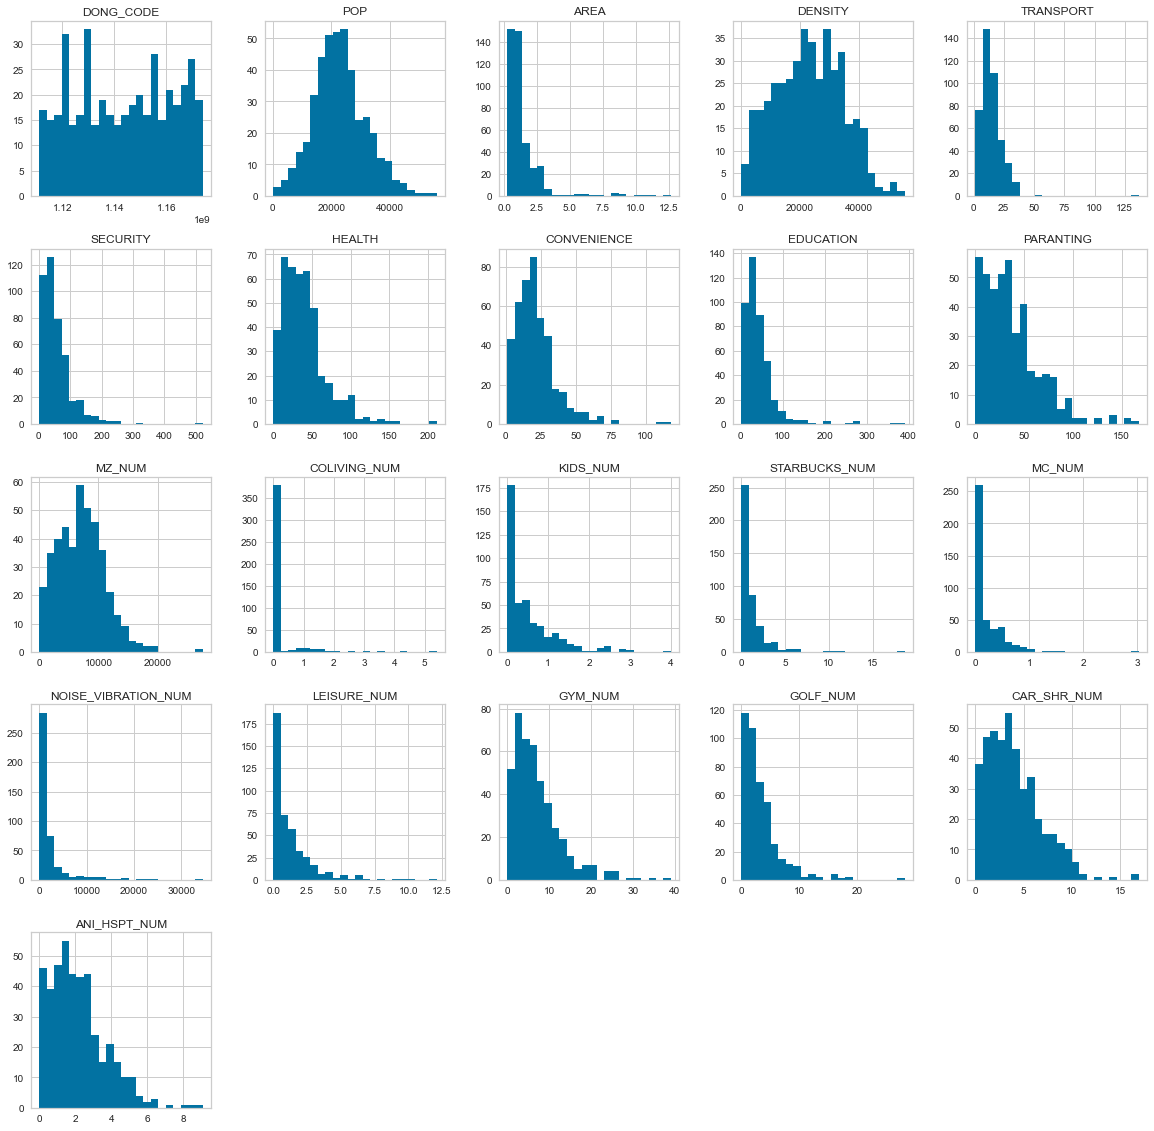

In [27]:
tmp_df.hist(figsize = (20, 20), bins = 22, legend = False)

In [28]:
origin_df = tmp_df.copy()

**소음**

In [29]:
noise = tmp_df['NOISE_VIBRATION_NUM']
noise

0       7321.400778
1      18575.609756
2       9471.140940
3       2664.317181
4        454.565953
           ...     
421     2152.736318
422     2031.455399
423     1994.009217
424     2351.630435
425     2207.653061
Name: NOISE_VIBRATION_NUM, Length: 426, dtype: float64

In [30]:
for i in range(len(noise)):
    if (noise[i] < 500):
        noise[i] = 4
    elif (noise[i] >= 500 and noise[i] < 1000):
        noise[i] = 3
    elif (noise[i] >= 1000 and noise[i] < 1500):
        noise[i] = 2
    else:
        noise[i] = 1
noise

0      1.0
1      1.0
2      1.0
3      1.0
4      4.0
      ... 
421    1.0
422    1.0
423    1.0
424    1.0
425    1.0
Name: NOISE_VIBRATION_NUM, Length: 426, dtype: float64

In [31]:
noise.value_counts()

1.0    147
4.0    124
3.0     99
2.0     56
Name: NOISE_VIBRATION_NUM, dtype: int64

In [32]:
tmp_df['NOISE_VIBRATION_NUM'] = noise
tmp_df

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,5.328145,23.216602,4.368353,4.543450,5.692607,2.853437,1249.027237,0.000000,0.000000,0.129702,0.000000,1.0,0.389105,0.000000,0.000000,0.389105,0.778210
1,종로구,사직동,1111053000,9636,1.23,7834,13.750678,36.314363,57.907859,28.054201,12.276423,16.531165,2234.959350,0.813008,0.000000,5.962060,0.000000,1.0,0.813008,14.634146,2.439024,4.065041,0.813008
2,종로구,삼청동,1111054000,2739,1.49,1838,7.818792,15.436242,4.496644,9.315436,1.006711,7.382550,459.060403,0.000000,0.000000,0.671141,0.000000,1.0,0.000000,2.013423,0.000000,0.671141,0.000000
3,종로구,부암동,1111055000,9782,2.27,4309,3.819383,18.942731,1.682819,4.854626,9.030837,2.202643,1138.766520,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.881057,0.881057,2.202643,1.321586
4,종로구,평창동,1111056000,18329,8.87,2066,3.926719,2.480271,1.517475,1.312289,2.213078,1.127396,518.263811,0.000000,0.000000,0.112740,0.000000,4.0,0.000000,0.563698,0.563698,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,16.303483,79.601990,84.378109,44.522388,67.995025,30.845771,12134.328358,0.000000,0.995025,1.990050,0.000000,1.0,2.487562,14.925373,6.965174,9.950249,3.980100
422,강동구,성내3동,1174066000,23346,0.71,32882,12.765258,75.117371,79.624413,42.014085,64.164319,29.107981,10028.169014,0.000000,0.938967,1.877934,0.000000,1.0,2.347418,14.084507,6.572770,9.389671,3.755869
423,강동구,길동,1174068500,45973,2.17,21186,12.709677,55.299539,52.949309,23.663594,34.778802,13.824885,6675.576037,0.000000,0.460829,0.921659,0.000000,1.0,1.382488,8.294931,4.147465,4.608295,3.686636
424,강동구,둔촌1동,1174069000,144,0.92,157,4.945652,36.413043,15.467391,12.885870,31.016304,0.000000,35.869565,0.000000,0.000000,0.000000,0.543478,1.0,0.000000,4.347826,3.260870,2.173913,1.630435


#### 1.4.3 최댓값 제한

**교육**

<AxesSubplot:>

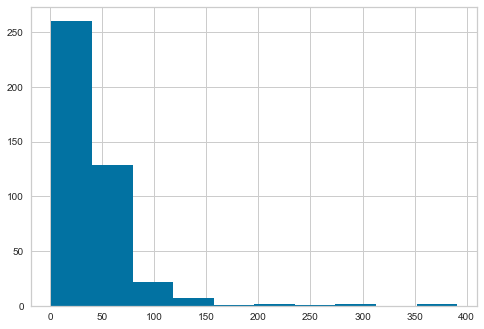

In [33]:
tmp_df['EDUCATION'].hist()

In [34]:
tmp_df['EDUCATION'].describe()

count    426.000000
mean      42.454016
std       42.415614
min        1.006711
25%       19.589909
50%       32.325255
75%       52.244898
max      390.982877
Name: EDUCATION, dtype: float64

In [35]:
e = tmp_df['EDUCATION'].quantile(0.95)
e

105.6954219807904

In [36]:
tmp_df[tmp_df['EDUCATION'] > e] = e

<AxesSubplot:>

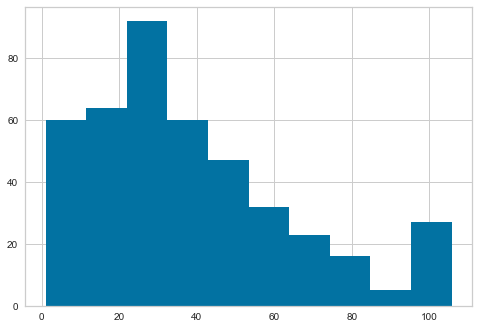

In [37]:
tmp_df['EDUCATION'].hist()

<AxesSubplot:>

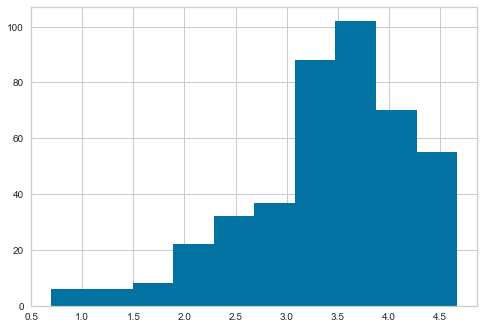

In [48]:
tmp_df['EDUCATION'] = np.log1p(tmp_df['EDUCATION'])
tmp_df['EDUCATION'].hist()

#### 1.4.4 RobustScaling

In [49]:
df = tmp_df.copy()
df

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,종로구,청운효자동,1.111052e+09,12177.0,2.57,4738.0,5.328145,23.216602,4.368353,4.543450,1.901003,2.853437,1249.027237,0.000000,0.000000,0.129702,0.000000,1.0,0.389105,0.000000,0.000000,0.389105,0.778210
1,종로구,사직동,1.111053e+09,9636.0,1.23,7834.0,13.750678,36.314363,57.907859,28.054201,2.585990,16.531165,2234.959350,0.813008,0.000000,5.962060,0.000000,1.0,0.813008,14.634146,2.439024,4.065041,0.813008
2,종로구,삼청동,1.111054e+09,2739.0,1.49,1838.0,7.818792,15.436242,4.496644,9.315436,0.696497,7.382550,459.060403,0.000000,0.000000,0.671141,0.000000,1.0,0.000000,2.013423,0.000000,0.671141,0.000000
3,종로구,부암동,1.111055e+09,9782.0,2.27,4309.0,3.819383,18.942731,1.682819,4.854626,2.305664,2.202643,1138.766520,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.881057,0.881057,2.202643,1.321586
4,종로구,평창동,1.111056e+09,18329.0,8.87,2066.0,3.926719,2.480271,1.517475,1.312289,1.167229,1.127396,518.263811,0.000000,0.000000,0.112740,0.000000,4.0,0.000000,0.563698,0.563698,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1.174065e+09,24106.0,0.67,35979.0,16.303483,79.601990,84.378109,44.522388,4.234034,30.845771,12134.328358,0.000000,0.995025,1.990050,0.000000,1.0,2.487562,14.925373,6.965174,9.950249,3.980100
422,강동구,성내3동,1.174066e+09,23346.0,0.71,32882.0,12.765258,75.117371,79.624413,42.014085,4.176912,29.107981,10028.169014,0.000000,0.938967,1.877934,0.000000,1.0,2.347418,14.084507,6.572770,9.389671,3.755869
423,강동구,길동,1.174068e+09,45973.0,2.17,21186.0,12.709677,55.299539,52.949309,23.663594,3.577356,13.824885,6675.576037,0.000000,0.460829,0.921659,0.000000,1.0,1.382488,8.294931,4.147465,4.608295,3.686636
424,강동구,둔촌1동,1.174069e+09,144.0,0.92,157.0,4.945652,36.413043,15.467391,12.885870,3.466245,0.000000,35.869565,0.000000,0.000000,0.000000,0.543478,1.0,0.000000,4.347826,3.260870,2.173913,1.630435


In [50]:
col = df.columns[6:]
data = df[col]

In [51]:
scaler = RobustScaler()
scaler.fit(data)
df_scaled = scaler.transform(data)
df_scaled

array([[-0.78277238, -0.40156946, -0.92093458, ..., -0.77933285,
        -0.84576644, -0.54693279],
       [ 0.00951441, -0.16266521,  0.66447526, ..., -0.00146491,
         0.12967946, -0.53039846],
       [-0.5484834 , -0.54348387, -0.91713562, ..., -0.77933285,
        -0.77092543, -0.9167005 ],
       ...,
       [-0.0884099 ,  0.18362596,  0.51764285, ...,  0.54340111,
         0.27383736,  0.83501015],
       [-0.81875256, -0.16086528, -0.59227027, ...,  0.26064276,
        -0.37214997, -0.14199695],
       [ 0.58105489, -0.20152917, -0.6203123 , ...,  0.19697079,
        -0.4074685 , -0.18942778]])

In [52]:
df[col] = df_scaled
data = df[col]

In [53]:
df

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,종로구,청운효자동,1.111052e+09,12177.0,2.57,4738.0,-0.782772,-0.401569,-0.920935,-0.924791,-1.689682,-0.748320,-0.933494,0.000000,-0.418214,-0.407129,0.000000,-0.666667,-0.211374,-0.876047,-0.779333,-0.845766,-0.546933
1,종로구,사직동,1.111053e+09,9636.0,1.23,7834.0,0.009514,-0.162665,0.664475,0.506833,-0.968695,-0.396493,-0.762154,0.813008,-0.418214,4.116073,0.000000,-0.666667,0.017533,1.294673,-0.001465,0.129679,-0.530398
2,종로구,삼청동,1.111054e+09,2739.0,1.49,1838.0,-0.548483,-0.543484,-0.917136,-0.634214,-2.957494,-0.631820,-1.070778,0.000000,-0.418214,0.012777,0.000000,-0.666667,-0.421491,-0.577391,-0.779333,-0.770925,-0.916701
3,종로구,부암동,1.111055e+09,9782.0,2.27,4309.0,-0.924698,-0.479525,-1.000458,-0.905843,-1.263754,-0.765061,-0.952656,0.000000,-0.418214,-0.507717,0.000000,-0.666667,-0.421491,-0.745357,-0.498341,-0.364526,-0.288747
4,종로구,평창동,1.111056e+09,18329.0,8.87,2066.0,-0.914601,-0.779802,-1.005355,-1.121544,-2.462022,-0.792719,-1.060490,0.000000,-0.418214,-0.420283,0.000000,0.333333,-0.421491,-0.792432,-0.599555,-0.949019,-0.916701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1.174065e+09,24106.0,0.67,35979.0,0.249650,0.626905,1.448311,1.509619,0.765966,-0.028283,0.958204,0.000000,0.815617,1.035638,0.000000,-0.666667,0.921792,1.337871,1.442041,1.691378,0.974450
422,강동구,성내3동,1.174066e+09,23346.0,0.71,32882.0,-0.083182,0.545105,1.307545,1.356882,0.705841,-0.072983,0.592186,0.000000,0.746106,0.948688,0.000000,-0.666667,0.846114,1.213143,1.316893,1.542623,0.867906
423,강동구,길동,1.174068e+09,45973.0,2.17,21186.0,-0.088410,0.183626,0.517643,0.239478,0.074774,-0.466106,0.009557,0.000000,0.153215,0.207062,0.000000,-0.666667,0.325053,0.354361,0.543401,0.273837,0.835010
424,강동구,둔촌1동,1.174069e+09,144.0,0.92,157.0,-0.818753,-0.160865,-0.592270,-0.416802,-0.042176,-0.821719,-1.144322,0.000000,-0.418214,-0.507717,1.433389,-0.666667,-0.421491,-0.231123,0.260643,-0.372150,-0.141997


## 2. K-means 군집화

### 2.1 1차 k-means clustering

#### 2.1.1 Elbow 관측

In [54]:
# 차원 축소 및 변환
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(data)

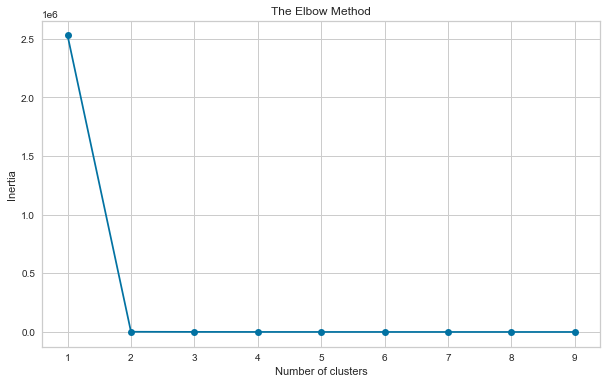

In [55]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### 2.1.2 k-means, n_cluster = 3

In [56]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(pca_transformed)

KMeans(n_clusters=3, random_state=0)

In [57]:
kmeans.labels_
df = tmp_df.copy()
df['km_cluster'] = kmeans.labels_
df.groupby('km_cluster').count()

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
km_cluster,,,,,,,,,,,,,,,,,,,,,,,
0,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118
1,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
2,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286


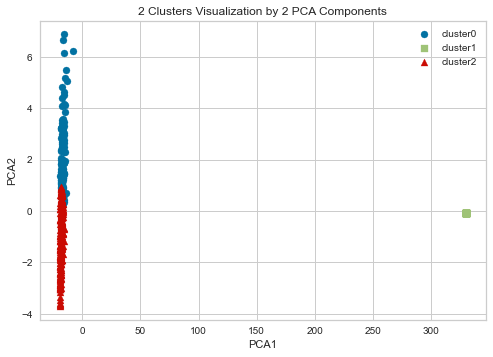

In [58]:
# 범주화 하지 않은 모델, minMaxScale 적용

df['pca_x'] = pca_transformed[:,0]
df['pca_y'] = pca_transformed[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df[df['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>','<']
for i in range(marker_n):
    plt.scatter(x = df.loc[markers[i], 'pca_x'], y = df.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('2 Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2'])
plt.show()

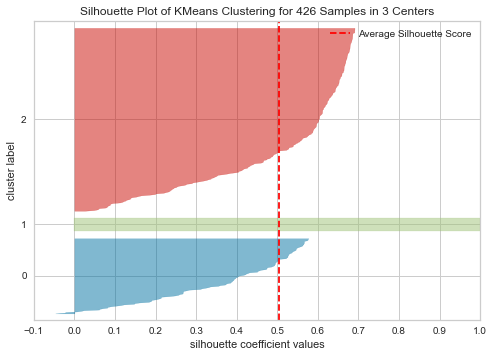

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 426 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [59]:
# visualizer 생성
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# 생성 된 visualizer에 데이터 입력 
visualizer.fit(pca_transformed)      
visualizer.show()

In [60]:
score = silhouette_score(data,df['km_cluster'])
print('Silhouette Score : {0: .3f}'.format(score))

Silhouette Score :  0.341


#### 2.1.3 각 군집 별 데이터 확인

**km_cluster == 0**

In [46]:
df_cluster_0 = df[df['km_cluster'] == 0][col]

In [47]:
df_cluster_0.describe()

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,17.707043,68.993367,50.794611,25.694497,52.925540,50.197441,9078.390517,0.175208,0.675270,1.159939,0.209674,2.420455,1.661577,9.154134,4.064780,5.082212,2.900728
std,11.781111,55.730812,17.844746,8.063506,25.405286,28.621003,3542.377218,0.542520,0.627109,0.954849,0.249985,1.230299,1.678902,3.706543,2.280027,2.105153,1.225942
min,5.204620,6.812652,16.947368,8.518519,9.750000,4.411765,402.970297,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.394158,35.360597,38.823715,20.364375,36.585122,30.690559,6838.011656,0.000000,0.093750,0.554408,0.000000,1.000000,0.530777,6.680506,2.435329,3.598020,2.061856
50%,15.669935,54.240029,47.933636,25.008791,47.664972,47.141001,8960.049020,0.000000,0.537883,0.980392,0.126276,3.000000,1.246118,8.740079,3.888220,4.992877,2.735588
75%,21.071422,81.372549,57.488432,29.858237,64.576589,64.933052,10972.322958,0.000000,1.044408,1.566612,0.402459,4.000000,2.424272,11.125887,5.388889,6.319121,3.736007
max,136.688552,522.500000,121.068783,55.423077,151.726190,167.705167,27574.074074,4.347826,2.816901,5.962060,0.980392,4.000000,10.344828,25.751073,12.017167,10.714286,6.349206


**km_cluster == 1**

In [48]:
df_cluster_1 = df[df['km_cluster'] == 1][col]

In [49]:
df_cluster_1.describe()

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,11.709916,37.243970,21.765115,12.727573,22.118083,22.337498,5092.583423,0.081971,0.225358,0.524839,0.128900,2.630332,0.573557,3.389065,1.600110,2.324816,1.190056
std,6.456744,29.768643,14.923547,7.391748,12.751528,17.128335,2931.723121,0.391200,0.306777,0.741695,0.254435,1.225067,0.774408,2.076805,1.213156,1.618662,0.801256
min,1.402529,1.104101,0.357143,1.037855,1.006711,0.000000,35.869565,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.706333,15.812500,12.514483,7.067887,11.362764,7.925640,2854.374021,0.000000,0.000000,0.089233,0.000000,1.000000,0.000000,1.891232,0.653595,1.143310,0.608583
50%,10.889773,31.842105,19.477833,11.961905,21.711174,18.670886,4646.979866,0.000000,0.069444,0.326797,0.000000,3.000000,0.284091,3.125000,1.449275,2.158273,1.146789
75%,15.209524,49.062604,28.333463,16.864480,29.526528,31.314100,7140.410113,0.000000,0.370829,0.661793,0.161873,4.000000,0.893142,4.571578,2.317354,3.304149,1.619815
max,37.400000,181.538462,134.900000,57.468750,57.340909,88.333333,16142.372881,3.508772,1.379310,5.128205,1.449275,4.000000,4.631579,10.000000,5.882353,8.974359,4.545455


**km_cluster == 2**

In [50]:
df_cluster_2 = df[df['km_cluster'] == 2][col]

In [51]:
df_cluster_2.describe()

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,19.482964,103.355692,92.162384,52.292389,105.220518,56.728958,9134.116128,0.583770,1.177818,4.590942,0.413054,1.820513,2.760441,18.311065,9.535870,8.750184,3.988305
std,8.552188,66.461631,33.125421,19.491597,96.968636,37.345933,4699.025128,1.172289,1.055030,3.468422,0.570162,1.097168,2.895951,8.115304,6.009667,3.147577,2.235161
min,3.775510,9.523810,31.087302,22.914286,1.166667,6.122449,1106.666667,0.000000,0.000000,1.282051,0.000000,1.000000,0.000000,1.351351,0.000000,0.000000,0.000000
25%,13.827045,49.661097,71.709909,39.850487,43.733277,29.980926,6167.925719,0.000000,0.329461,2.525804,0.000000,1.000000,0.905051,14.628503,4.798851,7.202020,2.671946
50%,17.524590,94.642857,89.411392,49.935484,75.953125,45.614035,8179.200000,0.000000,1.041667,3.508772,0.320513,1.000000,1.760563,18.181818,9.090909,8.333333,4.000000
75%,26.340510,127.265391,102.104965,59.266640,115.820591,89.273575,12060.818713,0.800051,1.820589,5.128949,0.605450,3.000000,3.044522,23.548644,12.651920,10.045279,5.064103
max,38.257143,321.304348,211.043478,118.065217,390.982877,154.782609,19633.333333,5.405405,4.000000,18.686869,3.030303,4.000000,12.121212,39.130435,28.260870,16.956522,9.090909


### 2.2 2차 k-means_clustering

#### 2.2.1 km_cluster == 0

- Elbow 관측

In [52]:
df_0 = df[df['km_cluster'] == 0][tmp_df.columns]
df_0

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
1,종로구,사직동,1111053000,9636,1.23,7834,13.750678,36.314363,57.907859,28.054201,12.276423,16.531165,2234.959350,0.813008,0.000000,5.962060,0.000000,1.0,0.813008,14.634146,2.439024,4.065041,0.813008
8,종로구,종로1.2.3.4가동,1111061500,8595,2.35,3657,21.558865,36.453901,63.449645,38.234752,31.765957,29.929078,1008.510638,1.276596,0.425532,5.673759,0.425532,1.0,1.702128,4.255319,2.127660,7.659574,0.000000
15,종로구,숭인1동,1111070000,6106,0.23,26548,33.173913,80.434783,58.130435,32.152174,24.347826,67.391304,7308.695652,4.347826,0.000000,2.173913,0.000000,1.0,6.521739,10.869565,4.347826,8.695652,4.347826
16,종로구,숭인2동,1111071000,10175,0.35,29071,19.142857,52.857143,38.200000,21.128571,16.000000,44.285714,11994.285714,0.000000,0.000000,1.428571,0.000000,1.0,4.285714,7.142857,2.857143,5.714286,2.857143
24,중구,신당동,1114061500,9095,0.55,16536,32.636364,142.424242,62.496970,42.000000,23.418182,56.666667,6552.727273,1.818182,0.303030,3.939394,0.000000,1.0,0.000000,11.515152,2.424242,9.393939,2.727273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,강동구,천호1동,1174060000,26973,0.71,37990,13.619718,125.821596,88.375587,44.502347,43.431925,38.497653,10816.901408,0.000000,2.816901,1.877934,0.469484,1.0,6.103286,6.572770,3.286385,7.981221,1.877934
419,강동구,천호3동,1174062000,27000,0.79,34177,6.354430,113.080169,79.426160,39.995781,39.033755,34.599156,12037.974684,0.000000,2.531646,1.687764,0.421941,1.0,5.485232,5.907173,2.953586,7.172996,1.687764
421,강동구,성내2동,1174065000,24106,0.67,35979,16.303483,79.601990,84.378109,44.522388,67.995025,30.845771,12134.328358,0.000000,0.995025,1.990050,0.000000,1.0,2.487562,14.925373,6.965174,9.950249,3.980100
422,강동구,성내3동,1174066000,23346,0.71,32882,12.765258,75.117371,79.624413,42.014085,64.164319,29.107981,10028.169014,0.000000,0.938967,1.877934,0.000000,1.0,2.347418,14.084507,6.572770,9.389671,3.755869


In [53]:
col_0 = df_0.columns[6:]
data_0 = df_0[col_0].values

In [54]:
pca_transformed_0 = pca.fit_transform(data_0)
df_0['pca_x'] = pca_transformed_0[:,0]
df_0['pca_y'] = pca_transformed_0[:,1]
df_0

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
1,종로구,사직동,1111053000,9636,1.23,7834,13.750678,36.314363,57.907859,28.054201,12.276423,16.531165,2234.959350,0.813008,0.000000,5.962060,0.000000,1.0,0.813008,14.634146,2.439024,4.065041,0.813008,-6843.438110,-17.654546
8,종로구,종로1.2.3.4가동,1111061500,8595,2.35,3657,21.558865,36.453901,63.449645,38.234752,31.765957,29.929078,1008.510638,1.276596,0.425532,5.673759,0.425532,1.0,1.702128,4.255319,2.127660,7.659574,0.000000,-8069.875689,-16.616380
15,종로구,숭인1동,1111070000,6106,0.23,26548,33.173913,80.434783,58.130435,32.152174,24.347826,67.391304,7308.695652,4.347826,0.000000,2.173913,0.000000,1.0,6.521739,10.869565,4.347826,8.695652,4.347826,-1769.604096,20.575869
16,종로구,숭인2동,1111071000,10175,0.35,29071,19.142857,52.857143,38.200000,21.128571,16.000000,44.285714,11994.285714,0.000000,0.000000,1.428571,0.000000,1.0,4.285714,7.142857,2.857143,5.714286,2.857143,2915.891142,-15.788167
24,중구,신당동,1114061500,9095,0.55,16536,32.636364,142.424242,62.496970,42.000000,23.418182,56.666667,6552.727273,1.818182,0.303030,3.939394,0.000000,1.0,0.000000,11.515152,2.424242,9.393939,2.727273,-2525.481958,82.243105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,강동구,천호1동,1174060000,26973,0.71,37990,13.619718,125.821596,88.375587,44.502347,43.431925,38.497653,10816.901408,0.000000,2.816901,1.877934,0.469484,1.0,6.103286,6.572770,3.286385,7.981221,1.877934,1738.611401,54.913525
419,강동구,천호3동,1174062000,27000,0.79,34177,6.354430,113.080169,79.426160,39.995781,39.033755,34.599156,12037.974684,0.000000,2.531646,1.687764,0.421941,1.0,5.485232,5.907173,2.953586,7.172996,1.687764,2959.648198,40.446337
421,강동구,성내2동,1174065000,24106,0.67,35979,16.303483,79.601990,84.378109,44.522388,67.995025,30.845771,12134.328358,0.000000,0.995025,1.990050,0.000000,1.0,2.487562,14.925373,6.965174,9.950249,3.980100,3055.941502,2.587444
422,강동구,성내3동,1174066000,23346,0.71,32882,12.765258,75.117371,79.624413,42.014085,64.164319,29.107981,10028.169014,0.000000,0.938967,1.877934,0.000000,1.0,2.347418,14.084507,6.572770,9.389671,3.755869,949.776215,1.898436


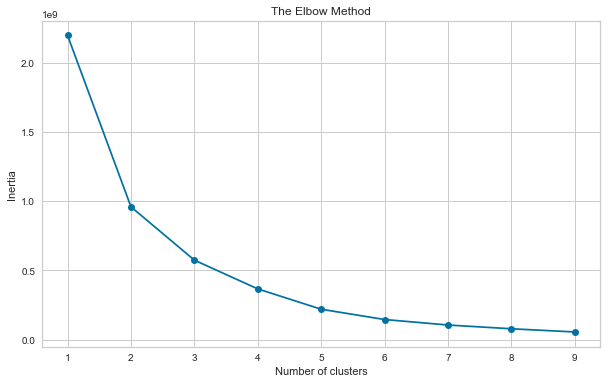

In [55]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed_0)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

- 2차 k-means : n_cluster = 3(Elbow)로 설정

In [56]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
# label
label_0 = kmeans.fit(pca_transformed_0)
# Getting unique labels
u_labels = np.unique(label_0)

In [57]:
df_0['km_cluster'] = kmeans.labels_
df_0.groupby('km_cluster').count()

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
km_cluster,,,,,,,,,,,,,,,,,,,,,,,,,
0,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
1,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47
2,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91


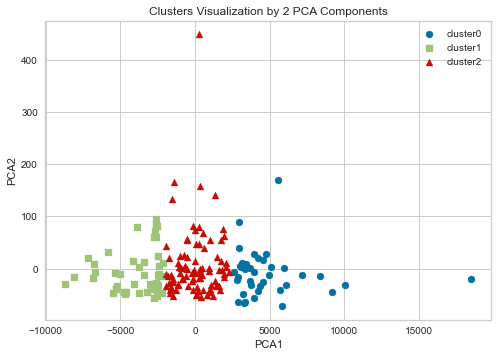

In [58]:
df_0['pca_x'] = pca_transformed_0[:,0]
df_0['pca_y'] = pca_transformed_0[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df_0['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df_0[df_0['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>']
for i in range(marker_n):
    plt.scatter(x = df_0.loc[markers[i], 'pca_x'], y = df_0.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2'])
plt.show()

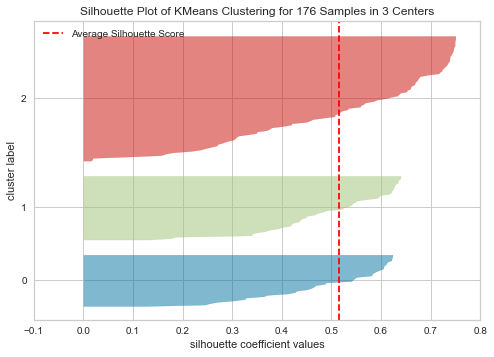

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 176 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [59]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(pca_transformed_0)      
visualizer.show()

In [60]:
score = silhouette_score(data_0,df_0['km_cluster'])
print('Silhouette Score : {0: .3f}'.format(score))

Silhouette Score :  0.514


#### 2.2.2 km_cluster == 1

- Elbow 관측

In [61]:
df_1 = df[df['km_cluster'] == 1][tmp_df.columns]
df_1

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,5.328145,23.216602,4.368353,4.543450,5.692607,2.853437,1249.027237,0.0,0.000000,0.129702,0.000000,1.0,0.389105,0.000000,0.000000,0.389105,0.778210
2,종로구,삼청동,1111054000,2739,1.49,1838,7.818792,15.436242,4.496644,9.315436,1.006711,7.382550,459.060403,0.0,0.000000,0.671141,0.000000,1.0,0.000000,2.013423,0.000000,0.671141,0.000000
3,종로구,부암동,1111055000,9782,2.27,4309,3.819383,18.942731,1.682819,4.854626,9.030837,2.202643,1138.766520,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.881057,0.881057,2.202643,1.321586
4,종로구,평창동,1111056000,18329,8.87,2066,3.926719,2.480271,1.517475,1.312289,2.213078,1.127396,518.263811,0.0,0.000000,0.112740,0.000000,4.0,0.000000,0.563698,0.563698,0.000000,0.000000
5,종로구,무악동,1111057000,8297,0.36,23047,13.416667,36.111111,13.888889,9.388889,43.888889,36.111111,5061.111111,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,2.777778,2.777778,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,강동구,암사2동,1174058000,15252,1.18,12925,9.138418,38.135593,24.271186,13.604520,40.528249,11.581921,3988.135593,0.0,1.129944,0.282486,0.000000,2.0,0.282486,4.519774,2.259887,1.129944,1.412429
416,강동구,암사3동,1174059000,17947,2.51,7150,5.407703,17.928287,11.410359,6.395750,19.053121,5.444887,1699.203187,0.0,0.531208,0.132802,0.000000,3.0,0.132802,2.124834,1.062417,0.531208,0.664011
418,강동구,천호2동,1174061000,33753,1.57,21499,9.121019,56.900212,39.966030,20.125265,19.641189,17.409766,7136.942675,0.0,1.273885,0.849257,0.212314,3.0,2.760085,2.972399,1.486200,3.609342,0.849257
424,강동구,둔촌1동,1174069000,144,0.92,157,4.945652,36.413043,15.467391,12.885870,31.016304,0.000000,35.869565,0.0,0.000000,0.000000,0.543478,1.0,0.000000,4.347826,3.260870,2.173913,1.630435


In [62]:
col_1 = df_1.columns[6:]
data_1 = df_1[col_1].values

In [63]:
pca_transformed_1 = pca.fit_transform(data_1)
df_1['pca_x'] = pca_transformed_1[:,0]
df_1['pca_y'] = pca_transformed_1[:,1]
df_1

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
0,종로구,청운효자동,1111051500,12177,2.57,4738,5.328145,23.216602,4.368353,4.543450,5.692607,2.853437,1249.027237,0.0,0.000000,0.129702,0.000000,1.0,0.389105,0.000000,0.000000,0.389105,0.778210,-3843.689897,0.556944
2,종로구,삼청동,1111054000,2739,1.49,1838,7.818792,15.436242,4.496644,9.315436,1.006711,7.382550,459.060403,0.0,0.000000,0.671141,0.000000,1.0,0.000000,2.013423,0.000000,0.671141,0.000000,-4633.661513,-1.687504
3,종로구,부암동,1111055000,9782,2.27,4309,3.819383,18.942731,1.682819,4.854626,9.030837,2.202643,1138.766520,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.881057,0.881057,2.202643,1.321586,-3953.969750,-3.486087
4,종로구,평창동,1111056000,18329,8.87,2066,3.926719,2.480271,1.517475,1.312289,2.213078,1.127396,518.263811,0.0,0.000000,0.112740,0.000000,4.0,0.000000,0.563698,0.563698,0.000000,0.000000,-4574.557128,-16.812806
5,종로구,무악동,1111057000,8297,0.36,23047,13.416667,36.111111,13.888889,9.388889,43.888889,36.111111,5061.111111,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,2.777778,2.777778,0.000000,-31.415356,-0.205085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,강동구,암사2동,1174058000,15252,1.18,12925,9.138418,38.135593,24.271186,13.604520,40.528249,11.581921,3988.135593,0.0,1.129944,0.282486,0.000000,2.0,0.282486,4.519774,2.259887,1.129944,1.412429,-1104.409777,5.900414
416,강동구,암사3동,1174059000,17947,2.51,7150,5.407703,17.928287,11.410359,6.395750,19.053121,5.444887,1699.203187,0.0,0.531208,0.132802,0.000000,3.0,0.132802,2.124834,1.062417,0.531208,0.664011,-3393.492957,-5.318095
418,강동구,천호2동,1174061000,33753,1.57,21499,9.121019,56.900212,39.966030,20.125265,19.641189,17.409766,7136.942675,0.0,1.273885,0.849257,0.212314,3.0,2.760085,2.972399,1.486200,3.609342,0.849257,2044.436721,10.746285
424,강동구,둔촌1동,1174069000,144,0.92,157,4.945652,36.413043,15.467391,12.885870,31.016304,0.000000,35.869565,0.0,0.000000,0.000000,0.543478,1.0,0.000000,4.347826,3.260870,2.173913,1.630435,-5056.679485,22.210189


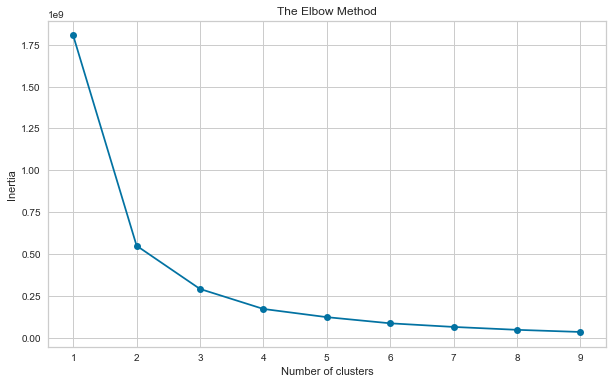

In [64]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed_1)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

- 2차 k-means : n_cluster = 3(Elbow)로 설정

In [65]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
# label
label_1 = kmeans.fit(pca_transformed_1)
# Getting unique labels
u_labels = np.unique(label_1)

In [66]:
df_1['km_cluster'] = kmeans.labels_
df_1.groupby('km_cluster').count()

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
km_cluster,,,,,,,,,,,,,,,,,,,,,,,,,
0,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
1,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72
2,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80


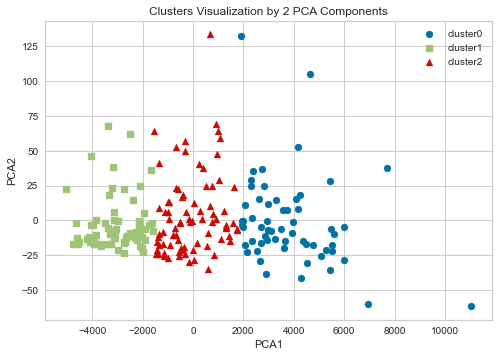

In [67]:
df_1['pca_x'] = pca_transformed_1[:,0]
df_1['pca_y'] = pca_transformed_1[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df_1['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df_1[df_1['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>']
for i in range(marker_n):
    plt.scatter(x = df_1.loc[markers[i], 'pca_x'], y = df_1.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2'])
plt.show()

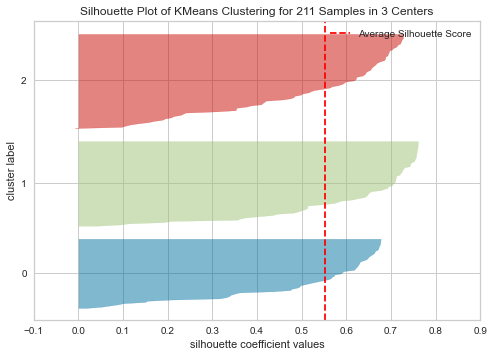

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 211 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [68]:
# visualizer 생성
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# 생성 된 visualizer에 데이터 입력 
visualizer.fit(pca_transformed_1)      
visualizer.show()

In [69]:
score = silhouette_score(data_1,df_1['km_cluster'])
print('Silhouette Score : {0: .3f}'.format(score))

Silhouette Score :  0.553


#### 2.2.3 km_cluster == 2

- Elbow 관측

In [70]:
df_2 = df[df['km_cluster'] == 2][tmp_df.columns]
df_2

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
6,종로구,교남동,1111058000,10203,0.35,29151,38.257143,28.571429,56.628571,22.914286,40.571429,102.857143,8122.857143,0.000000,2.857143,11.428571,0.000000,1.0,0.000000,5.714286,0.000000,0.000000,2.857143
17,중구,소공동,1114052000,3367,0.95,3544,26.105263,86.315789,63.778947,52.884211,8.310526,32.105263,1150.526316,3.157895,0.000000,9.473684,0.000000,1.0,0.000000,6.842105,3.157895,8.947368,0.000000
18,중구,회현동,1114054000,5432,0.84,6467,27.750000,115.476190,73.321429,60.148810,1.267857,45.833333,1413.095238,1.190476,0.000000,11.309524,0.000000,1.0,0.000000,5.952381,0.000000,8.928571,0.000000
19,중구,명동,1114055000,3742,0.99,3780,32.646465,125.757576,144.606061,111.616162,14.964646,44.444444,1235.353535,3.030303,0.000000,18.686869,3.030303,1.0,1.010101,18.181818,3.030303,7.070707,0.000000
22,중구,광희동,1114059000,6340,0.74,8568,24.608108,122.972973,47.500000,75.533784,3.405405,26.351351,3525.675676,5.405405,1.351351,4.729730,0.000000,1.0,6.756757,1.351351,2.702703,7.432432,0.675676
23,중구,을지로동,1114060500,1914,0.60,3190,30.533333,98.333333,73.866667,75.766667,1.166667,46.666667,1106.666667,0.000000,0.000000,5.000000,0.000000,1.0,1.666667,3.333333,5.000000,3.333333,5.000000
30,중구,황학동,1114067000,13444,0.33,40739,17.090909,181.818182,67.333333,42.151515,6.363636,81.818182,16354.545455,0.000000,3.030303,3.030303,0.000000,1.0,12.121212,18.181818,9.090909,6.060606,9.090909
73,광진구,자양1동,1121582000,23134,0.57,40586,19.017544,70.614035,68.412281,40.109649,69.535088,45.614035,14417.543860,0.000000,2.192982,2.192982,0.438596,3.0,3.070175,17.543860,9.210526,10.526316,3.947368
77,광진구,구의1동,1121585000,22139,0.56,39534,15.190476,94.642857,68.428571,50.142857,108.273810,66.666667,16314.285714,0.000000,0.000000,1.785714,0.000000,2.0,1.785714,24.404762,10.714286,5.357143,2.380952
112,성북구,동선동,1129057500,16115,0.73,22075,16.041096,132.648402,86.625571,39.591324,105.773973,14.840183,10345.205479,0.000000,2.968037,2.968037,0.000000,1.0,8.219178,15.753425,2.511416,7.762557,4.337900


In [71]:
col_2 = df_2.columns[6:-2]
data_2 = df_2[col_2].values

In [72]:
pca_transformed_2 = pca.fit_transform(data_2)
df_2['pca_x'] = pca_transformed_2[:,0]
df_2['pca_y'] = pca_transformed_2[:,1]
df_2

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
6,종로구,교남동,1111058000,10203,0.35,29151,38.257143,28.571429,56.628571,22.914286,40.571429,102.857143,8122.857143,0.000000,2.857143,11.428571,0.000000,1.0,0.000000,5.714286,0.000000,0.000000,2.857143,-1011.238729,-61.793137
17,중구,소공동,1114052000,3367,0.95,3544,26.105263,86.315789,63.778947,52.884211,8.310526,32.105263,1150.526316,3.157895,0.000000,9.473684,0.000000,1.0,0.000000,6.842105,3.157895,8.947368,0.000000,-7983.859448,-76.787916
18,중구,회현동,1114054000,5432,0.84,6467,27.750000,115.476190,73.321429,60.148810,1.267857,45.833333,1413.095238,1.190476,0.000000,11.309524,0.000000,1.0,0.000000,5.952381,0.000000,8.928571,0.000000,-7721.250217,-85.334666
19,중구,명동,1114055000,3742,0.99,3780,32.646465,125.757576,144.606061,111.616162,14.964646,44.444444,1235.353535,3.030303,0.000000,18.686869,3.030303,1.0,1.010101,18.181818,3.030303,7.070707,0.000000,-7899.023721,-69.935364
22,중구,광희동,1114059000,6340,0.74,8568,24.608108,122.972973,47.500000,75.533784,3.405405,26.351351,3525.675676,5.405405,1.351351,4.729730,0.000000,1.0,6.756757,1.351351,2.702703,7.432432,0.675676,-5608.782605,-91.137340
23,중구,을지로동,1114060500,1914,0.60,3190,30.533333,98.333333,73.866667,75.766667,1.166667,46.666667,1106.666667,0.000000,0.000000,5.000000,0.000000,1.0,1.666667,3.333333,5.000000,3.333333,5.000000,-8027.698213,-84.973448
30,중구,황학동,1114067000,13444,0.33,40739,17.090909,181.818182,67.333333,42.151515,6.363636,81.818182,16354.545455,0.000000,3.030303,3.030303,0.000000,1.0,12.121212,18.181818,9.090909,6.060606,9.090909,7220.237234,-120.804503
73,광진구,자양1동,1121582000,23134,0.57,40586,19.017544,70.614035,68.412281,40.109649,69.535088,45.614035,14417.543860,0.000000,2.192982,2.192982,0.438596,3.0,3.070175,17.543860,9.210526,10.526316,3.947368,5283.214452,-49.442123
77,광진구,구의1동,1121585000,22139,0.56,39534,15.190476,94.642857,68.428571,50.142857,108.273810,66.666667,16314.285714,0.000000,0.000000,1.785714,0.000000,2.0,1.785714,24.404762,10.714286,5.357143,2.380952,7180.129175,-16.971579
112,성북구,동선동,1129057500,16115,0.73,22075,16.041096,132.648402,86.625571,39.591324,105.773973,14.840183,10345.205479,0.000000,2.968037,2.968037,0.000000,1.0,8.219178,15.753425,2.511416,7.762557,4.337900,1210.929815,-2.828588


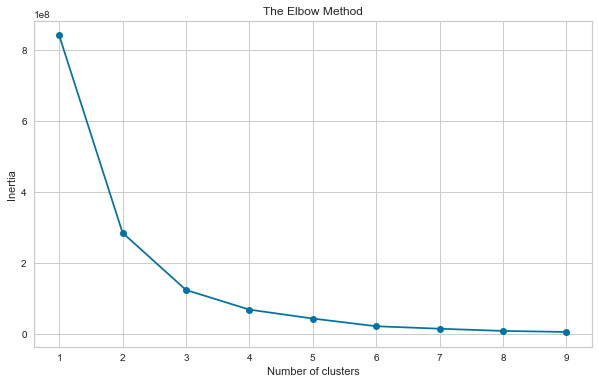

In [73]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed_2)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

- 2차 k-means : n_cluster = 3(Elbow)로 설정

In [74]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
# label
label_2 = kmeans.fit(pca_transformed_2)
# Getting unique labels
u_labels = np.unique(label_2)

In [75]:
df_2['km_cluster'] = kmeans.labels_
df_2.groupby('km_cluster').count()

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
km_cluster,,,,,,,,,,,,,,,,,,,,,,,,,
0,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
1,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
2,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


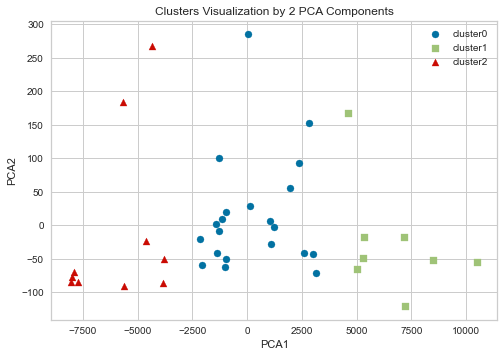

In [76]:
df_2['pca_x'] = pca_transformed_2[:,0]
df_2['pca_y'] = pca_transformed_2[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df_2['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df_2[df_2['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>']
for i in range(marker_n):
    plt.scatter(x = df_2.loc[markers[i], 'pca_x'], y = df_2.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2','cluster3'])
plt.show()

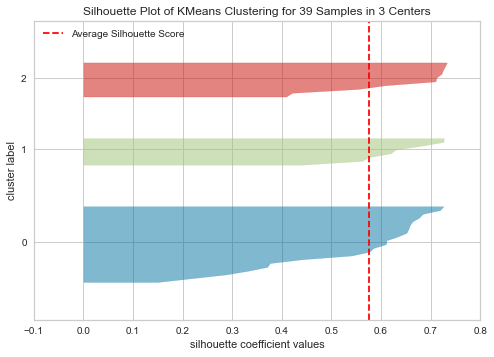

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 39 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [77]:
# visualizer 생성
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# 생성 된 visualizer에 데이터 입력 
visualizer.fit(pca_transformed_2)      
visualizer.show()

In [78]:
score = silhouette_score(data_2,df_2['km_cluster'])
print('Silhouette Score : {0: .3f}'.format(score))

Silhouette Score :  0.574
